Dataset Shape: (43632, 10)
   product_id         brand_name  \
0   203649408             Beauut   
1   203351875           Lola May   
2   202386189          Liquorish   
3   203060420  French Connection   
4   203047112  French Connection   

                                               title  current_price  \
0  Beauut Bridesmaid allover embellished maxi dre...          176.0   
1  Lola May midaxi tiered shirt dress in abstract...           43.0   
2  Liquorish a line lace detail midi dress in flo...           51.0   
3  French Connection Mozart high neck jumper in b...           84.0   
4  French Connection front seam wide sleeve jumpe...           92.0   

   previous_price  colour currency    rrp  productCode productType  
0             NaN     NaN      USD  241.0    121375112     Product  
1             NaN     NaN      USD   62.0    120646950     Product  
2             NaN     NaN      USD  125.0    116551828     Product  
3             NaN     NaN      USD  109.0    11950051

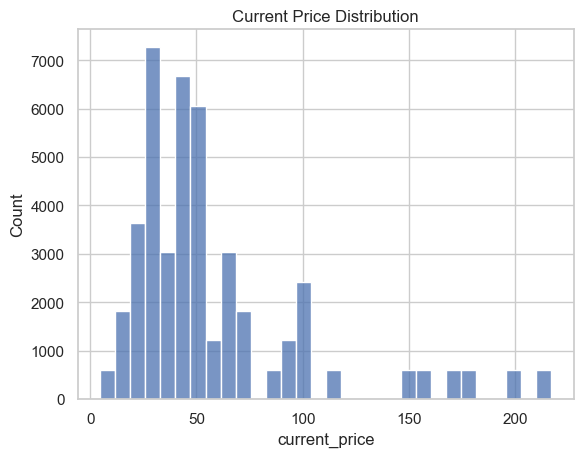

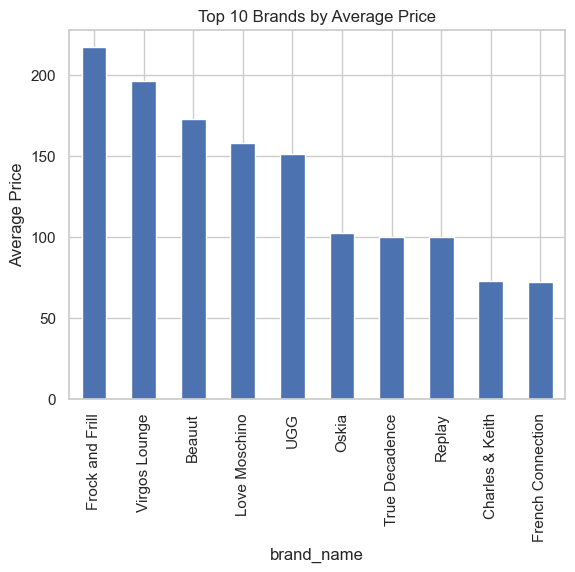

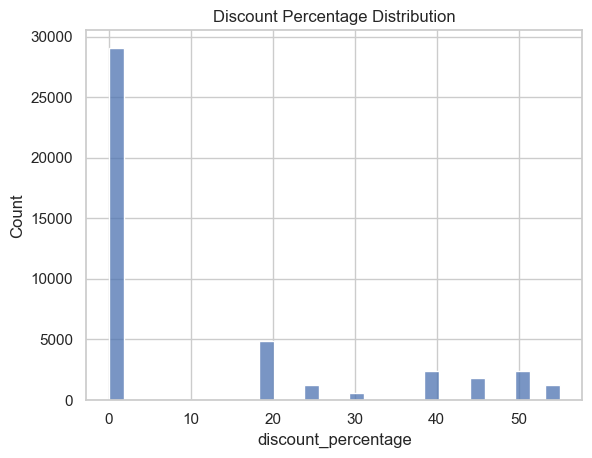


Model Performance:
Mean Squared Error: 2.1977540209697923
R2 Score: 0.9988729416127594


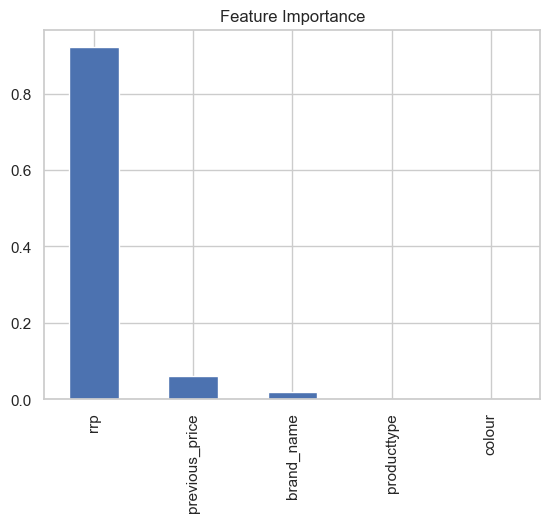


Script Completed Successfully!


In [3]:
# ============================================
# ASOS WOMEN FASHION - PRODUCT ANALYSIS SCRIPT
# ============================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")

# 2. Load Dataset
df = pd.read_csv(r'C:\Users\Irene Rachel\Documents\AsosWomenfashion.csv')
print("Dataset Shape:", df.shape)
print(df.head())

# 3. Clean Column Names
df.columns = df.columns.str.strip().str.lower()

# 4. Convert Prices to Numeric
price_columns = ['current_price', 'previous_price', 'rrp']

for col in price_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 5. Handle Missing Values
df = df.dropna(subset=['current_price'])
df.fillna(0, inplace=True)

# 6. Create Discount Feature
df['discount_amount'] = df['previous_price'] - df['current_price']
df['discount_percentage'] = np.where(
    df['previous_price'] > 0,
    (df['discount_amount'] / df['previous_price']) * 100,
    0
)

print("\nDiscount Summary:")
print(df[['discount_amount', 'discount_percentage']].describe())

# ============================================
# EXPLORATORY DATA ANALYSIS
# ============================================

# 7. Price Distribution
plt.figure()
sns.histplot(df['current_price'], bins=30)
plt.title("Current Price Distribution")
plt.show()

# 8. Top Brands by Average Price
top_brands = df.groupby('brand_name')['current_price'].mean().sort_values(ascending=False).head(10)

plt.figure()
top_brands.plot(kind='bar')
plt.title("Top 10 Brands by Average Price")
plt.ylabel("Average Price")
plt.show()

# 9. Discount Distribution
plt.figure()
sns.histplot(df['discount_percentage'], bins=30)
plt.title("Discount Percentage Distribution")
plt.show()

# ============================================
# MACHINE LEARNING MODEL
# Predict Current Price
# ============================================

# Encode Categorical Columns
label_cols = ['brand_name', 'colour', 'producttype']

le = LabelEncoder()

for col in label_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

# Define Features & Target
features = ['brand_name', 'colour', 'producttype', 'previous_price', 'rrp']
features = [f for f in features if f in df.columns]

X = df[features]
y = df['current_price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Feature Importance
importance = pd.Series(model.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)

plt.figure()
importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

print("\nScript Completed Successfully!")
